Họ và tên: Đặng Văn Minh
MSSV: 19521832

Trap5 - POPOP - 1X: thực nghiệm giải vấn đề trap 5 bằng cài đặt POPOP với cài đặt one point crossover

1 - Packages

2 - Code

     - initial_population
     - trap_5
     - crossover_1X
     - tournament_selection
     - convergence
     - POPOP_genetic_algorithm
     - pass_10_time
     - upper_bound
     - MRPS
     
3 - Experiments: Bisection - MRPS

    - Probelm size: 10
    - Probelm size: 20
    - Probelm size: 40
    - Probelm size: 80
    - Probelm size: 160

# 1 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 - Code


In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
def trap_5(ind):
    num_variables = len(ind)
    if num_variables % 5 != 0:
        print(f'Error -- Length of individual is not suitable')
        return -1
    num_traps = num_variables // 5
    
    fitness = 0
    for i in range(num_traps):
        trap_i = np.sum(ind[i*5:i*5+5])
        if trap_i != 5:
            trap_i = 4-trap_i
        fitness += np.sum(trap_i)
        
    return fitness

In [4]:
def crossover_1X(pop):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất one point crossover. 
        cross_point = np.random.randint(num_parameters)
#         print(f'cross point: {cross_point}')
        for idx in range(cross_point, num_parameters):
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [5]:
pop = initialize_population(2, 10)
print(f'population\n: {pop}')
offstring = crossover_1X(pop)
print(f'offstring\n: {offstring}')

population
: [[0 0 1 1 0 0 0 0 1 1]
 [0 1 1 0 1 0 0 1 0 1]]
offstring
: [[0 1 1 0 1 0 0 1 1 1]
 [0 0 1 1 0 0 0 0 0 1]]


In [6]:
def tournament_selection(parent_population, parent_fitness, population_size, tourament_size):
    
    """
    Hàm thực hiện tournament selection:
    Args: 
        - parent_population: quần thể được sử dụng để chọn ra thế hệ tiếp theo
        - parent_fitness: fitness của những cá thể trong parent_population
        - population_size: kích thước thế hệ tiếp theo
        - tournament_size: kích thước chia parent_population để thược hiện lựa chọn cạnh tranh 
        
    Returns:
        - selected_indices: chỉ số những cá thể được chọn
    
    # vd:   parent_population: có 8 cá thể => len(parent_fitness) = 8
            population_size: chọn 4 cá thể cho thế hệ tiếp theo
            tournament_size: 4
    """
    
    n_tournament = len(parent_population) //tournament_size # 8/4 = 2 -> mỗi lần chia quần thể thành 2 phần bằng nhau
    n_loop = population_size // n_tournament                # 4/2 = 2 -> cần 2 lần chia để chọn đủ 4 cá thể 
    selected_indices = []
    indices = np.arange(len(parent_population))
    
    for i in range(n_loop):
        # Xáo trộn quần thể
        np.random.shuffle(indices)
        
        # xét qua từng tournament
        for tournament in range(n_tournament):
            # lấy điểm bắt đầu tournament
            begin_point = tournament * tournament_size
            
            tournament_indices = indices[begin_point:begin_point+tournament_size]
            # Tìm phần tử có fitness lớn nhất 
            idx_max = np.argmax(parent_fitness[tournament_indices])
            # Thêm cá thể được chọn vào danh sách
            selected_indices.append(tournament_indices[idx_max])
        
    return np.array(selected_indices)

In [7]:
def convergence(pop):
    """
    Convergence when individuals is all the same ==> row is all the same
    Args: 
        - Population: (n_individuals, n_variables)
    Return:
        - True if all inds same else False
        
    vd:  arr = [[0, 1, 1, 0],
                [0, 1, 1, 0]]
        sum(arr) = [0, 2, 2, 0] 
        - phần tử của sum(arr) == 0 or len(arr) ==> hội tụ
        
    """
    n_ind, n_var = pop.shape
    
    # sum all row
    arr = pop.sum(axis=0)
    
    for i in range(n_var):
        if arr[i] != 0 and arr[i] != n_ind:
            return False
    return True

In [8]:
def POPOP_genetic_algorithm(num_individuals, num_parameters, tournament_size):
    
    """
    Args: 
        - num_individuals: số cá thể của quần thể
        - num_parameters: độ dài cá thể 
        - tournament_size: kích thước tournament sử dụng cho tournament selection
    Returns: 
        - is_optimal: 1 nếu tìm được đáp án (cá thể chứa toàn 1) ngược lại 0
        - num_of_evaluations: số lần gọi hàm đánh giá
    """
    
    # Initialize individuals
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([trap_5(ind) for ind in pop])
    
    num_of_evaluations = len(pop)
    
    generations = 0
#     print(f'Gen: 0')
#     print(pop_fitness)
    
    while True:
        # check convergence of population
        if convergence(pop) == True: 
            break  
        # if not converge, create new generation
        generations += 1
            
        # Create offstring use crossover, do not use mutation
        offstring = crossover_1X(pop)
        offstring_fitness = np.array([trap_5(ind) for ind in offstring])
        num_of_evaluations += len(offstring)
        
        
        # P + O pool
        P_O_pool = np.vstack((pop, offstring))
        P_O_pool_fitness = np.hstack((pop_fitness, offstring_fitness))
        
        # Select parent for next generation
        selected_indices = tournament_selection(P_O_pool, P_O_pool_fitness, num_individuals, tournament_size)
        pop = P_O_pool[selected_indices]
        pop_fitness = P_O_pool_fitness[selected_indices]
        
#         print(f'Gen: {generations}') 
#         print(pop_fitness)
        
#     print('# Final result:')
#     print(pop)
#     print(pop_fitness)
        
    # return 1 if can find optimal solution else 0      
    is_optimal = 0
    if (pop_fitness == num_parameters).all():
        is_optimal = 1
    return is_optimal, num_of_evaluations

In [9]:
# test POPOP_genetic_algorithm
problem_size = 10
population_size = 4
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(population_size, problem_size, tournament_size)

(0, 12)

In [10]:
def pass_10_test(population_size, problem_size, tournament_size, random_seed):
    """
    Chạy 10 lần POPOP_genetic_algorithm với cùng kích thước quần thể và random_seed khác nhau,
    dừng lại khi gặp lần chạy không tìm được có có thể tối ưu
    
    Args: 
        - Population_size
        - problem_size
        - tournament_size
        - random_seed
    Returns:
        - success_10_time: True nếu 10 lần thực hiện POPOP_genetic_algorithm tìm được cá thể tối ưu ngược lại False
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá trong quá trình chạy
    """
    
    success_10_time = True
    num_evaluations = []
    
    # lặp 10 lần với random seed khác nhau  
    for i in range(10):
        
        np.random.seed(random_seed + i)
#         print(f'Lần {i} - random seed {random_seed}')
        
        success, num_evaluation = POPOP_genetic_algorithm(population_size, problem_size, tournament_size)
#         print(f' -- success: {success} \n -- số lần gọi hàm đánh giá: {num_evaluation}')
        
        num_evaluations.append(num_evaluation)
        
        # nếu lần chạy không tìm được cá thể tối ưu thì break
        if success == 0:
#             print("BREAK")
            success_10_time = False
            break
        
    average_number_of_evaluations = np.mean(num_evaluations)
    
    return success_10_time, average_number_of_evaluations

In [11]:
# test pass_10_test
problem_size = 10
population_size = 30
tournament_size = 4
random_seed = 19521832
test, ane = pass_10_test(population_size, problem_size, tournament_size, random_seed)
print(f'success: {test}')
print(f'average_number_of_evaluations: {ane}')

success: False
average_number_of_evaluations: 300.0


In [13]:
def upper_bound(problem_size, tournament_size, random_seed):
    """
    Tìm cận trên của MRPS
    
    Args: 
        - problem_size: kích thước vấn đề (độ dài một cá thể)
        - tournament_size: khích thược 1 tournament
        - random_seed: random seed bắt đầu, những random seed sau sẽ tự động sét +1 random seed trước
    Returns:
        - success: True nếu tìm thấy N_upper ngược lại False
        - N_upper: cận trên tìm được hoặc -1 nếu không tìm được
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá
    """
    # N_upper vượt quá 8192 sẽ không tìm nữa
    limitted_N_upper = 8192
    N_upper = 4 # initialize N_upper
    success = False
    
    while success == False:
        N_upper *= 2
        
        if N_upper > limitted_N_upper: 
            print(f'N_upper is so big! -- N_upper >> {limitted_N_upper}')
            break
            
        success, average_number_of_evaluations = pass_10_test(N_upper, problem_size, tournament_size, random_seed)
        
    # if do not seek N_upper <= 8192 return N_upper = -1 
    if success == False:
        N_upper = -1
    return success, N_upper, average_number_of_evaluations

In [14]:
problem_size = 10
tournament_size = 4
random_seed = 19521832
success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
print(f'success: {success}')
print(f'N_upper: {N_upper}')
print(f'average_number_of_evaluations: {average_number_of_evaluations}')

success: True
N_upper: 128
average_number_of_evaluations: 1075.2


In [17]:
def MRPS(problem_size, tournament_size, random_seed):
    """
    Thực hiên tìm MRPS bằng bisection
    
    Args:
      - problem_size: 
      - tournament_size:
      - random seed:
    Returns:
     - N_upper: MRPS tìm được
     - average_number_of_evaluations: trung bịnh sô lần gọi hàm đánh giá đối với N_upper trên
    """
    # Giai đoạn 1: tìm cận trên
    success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
#     print(f'N_upper population size: {N_upper} -- num_of_evas: {average_number_of_evaluations}')
    average_number_of_evaluations_ = average_number_of_evaluations
    
    # Giai đoạn 2: tìm MRPS
    if success == False:
        return N_upper, average_number_of_evaluations_
    
    print(f'N_upper: {N_upper}')
    
    N_lower = N_upper/2
    
    while (N_upper - N_lower)/N_upper > 0.1:
        
        N = int((N_upper + N_lower)/2)
        
        success, average_number_of_evaluations = pass_10_test(N, problem_size, tournament_size, random_seed)
#         print(f'population size: {N} -- num_of_evas: {average_number_of_evaluations} -> {success}')
        
        if success == True:
            average_number_of_evaluations_ = average_number_of_evaluations
            N_upper = N
        else:
            N_lower = N
            
        if (N_upper - N_lower) <= 2:
            break
            
    return N_upper, average_number_of_evaluations_

In [16]:
problem_size = 20
tournament_size = 4
random_seed = 19521832
mrps, evaluations = MRPS(problem_size, tournament_size, random_seed)
print(f'MRPS: {mrps} -- num_of_evas: {evaluations}')

MRPS: 256 -- num_of_evas: 3200.0


# Experiment

In [18]:
# khỏi tạo danh sách lưu lại mrps và evaluation khi chạy bisection qua mỗi problem size
mrps_over_problem_size = {}
evaluations_over_problem_size  = {}

## Problem size - 10

In [17]:
problem_size = 10
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_10'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_10'] = evaluations_10_bisection

Bisection 0
--Minimally required population size: 96
--Number of evaluation: ------------- 883.2
Bisection 1
--Minimally required population size: 96
--Number of evaluation: ------------- 768.0
Bisection 2
--Minimally required population size: 112
--Number of evaluation: ------------- 1008.0
Bisection 3
--Minimally required population size: 128
--Number of evaluation: ------------- 1075.2
Bisection 4
--Minimally required population size: 144
--Number of evaluation: ------------- 1252.8
Bisection 5
--Minimally required population size: 112
--Number of evaluation: ------------- 884.8
Bisection 6
--Minimally required population size: 104
--Number of evaluation: ------------- 873.6
Bisection 7
--Minimally required population size: 64
--Number of evaluation: ------------- 531.2
Bisection 8
--Minimally required population size: 104
--Number of evaluation: ------------- 863.2
Bisection 9
--Minimally required population size: 136
--Number of evaluation: ------------- 1183.2


## Problem size - 20

In [18]:
problem_size = 20
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_20'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_20'] = evaluations_10_bisection


Bisection 0
--Minimally required population size: 256
--Number of evaluation: ------------- 3200.0
Bisection 1
--Minimally required population size: 256
--Number of evaluation: ------------- 3379.2
Bisection 2
--Minimally required population size: 272
--Number of evaluation: ------------- 3563.2
Bisection 3
--Minimally required population size: 272
--Number of evaluation: ------------- 3372.8
Bisection 4
--Minimally required population size: 256
--Number of evaluation: ------------- 3353.6
Bisection 5
--Minimally required population size: 352
--Number of evaluation: ------------- 4576.0
Bisection 6
--Minimally required population size: 320
--Number of evaluation: ------------- 4032.0
Bisection 7
--Minimally required population size: 240
--Number of evaluation: ------------- 3048.0
Bisection 8
--Minimally required population size: 288
--Number of evaluation: ------------- 3830.4
Bisection 9
--Minimally required population size: 288
--Number of evaluation: ------------- 3657.6


## Problem size - 40

In [19]:
problem_size = 40
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_40'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_40'] = evaluations_10_bisection


Bisection 0
--Minimally required population size: 960
--Number of evaluation: ------------- 18432.0
Bisection 1
--Minimally required population size: 576
--Number of evaluation: ------------- 10598.4
Bisection 2
--Minimally required population size: 768
--Number of evaluation: ------------- 14592.0
Bisection 3
--Minimally required population size: 832
--Number of evaluation: ------------- 15974.4
Bisection 4
--Minimally required population size: 704
--Number of evaluation: ------------- 13446.4
Bisection 5
--Minimally required population size: 896
--Number of evaluation: ------------- 16844.8
Bisection 6
--Minimally required population size: 960
--Number of evaluation: ------------- 17280.0
Bisection 7
--Minimally required population size: 832
--Number of evaluation: ------------- 15808.0
Bisection 8
--Minimally required population size: 768
--Number of evaluation: ------------- 14668.8
Bisection 9
--Minimally required population size: 896
--Number of evaluation: ------------- 17113.6


## Problem size - 80

In [20]:
problem_size = 80
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
      
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_80'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_80'] = evaluations_10_bisection


Bisection 0 random seed: 19521832
--Minimally required population size: 2816
--Number of evaluation: ------------- 74905.6
Bisection 1 random seed: 19521842
--Minimally required population size: 2560
--Number of evaluation: ------------- 72704.0
Bisection 2 random seed: 19521852
--Minimally required population size: 4352
--Number of evaluation: ------------- 119680.0
Bisection 3 random seed: 19521862
--Minimally required population size: 2304
--Number of evaluation: ------------- 67737.6
Bisection 4 random seed: 19521872
--Minimally required population size: 3840
--Number of evaluation: ------------- 111360.0
Bisection 5 random seed: 19521882
--Minimally required population size: 3072
--Number of evaluation: ------------- 81408.0
Bisection 6 random seed: 19521892
--Minimally required population size: 2816
--Number of evaluation: ------------- 81664.0
Bisection 7 random seed: 19521902
--Minimally required population size: 4352
--Number of evaluation: ------------- 118374.4
Bisection 8 r

## Problem size - 160

In [20]:
problem_size = 160
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_160'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_160'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
N_upper is so big! -- N_upper >> 8192
--Minimally required population size: -1
--Number of evaluation: ------------- 344064.0
Bisection 1 - random seed from 19521842 - 19521852
N_upper is so big! -- N_upper >> 8192
--Minimally required population size: -1
--Number of evaluation: ------------- 353280.0
Bisection 2 - random seed from 19521852 - 19521862
N_upper is so big! -- N_upper >> 8192
--Minimally required population size: -1
--Number of evaluation: ------------- 337920.0
Bisection 3 - random seed from 19521862 - 19521872
N_upper is so big! -- N_upper >> 8192
--Minimally required population size: -1
--Number of evaluation: ------------- 354986.6666666667
Bisection 4 - random seed from 19521872 - 19521882
N_upper is so big! -- N_upper >> 8192
--Minimally required population size: -1
--Number of evaluation: ------------- 349525.3333333333
Bisection 5 - random seed from 19521882 - 19521892
N_upper is so big! -- N_upper >> 8192
--Minima

# Save data

In [21]:
df_mrps = pd.DataFrame(mrps_over_problem_size)
df_mrps.to_csv('experiments/mrps_trap5_1X.csv', index_label='run_time')

df_evaluations = pd.DataFrame(evaluations_over_problem_size)
df_evaluations.to_csv('experiments/evaluations_trap5_1X.csv', index_label='run_time')


# Load data

In [18]:
df_mrps_saved = pd.read_csv('experiments/mrps_trap5_1X.csv', index_col='run_time')
df_evaluations_saved = pd.read_csv('experiments/evaluations_trap5_1X.csv', index_col='run_time')

In [19]:
df_mrps_saved

,problem_size_10,problem_size_20,problem_size_40,problem_size_80,problem_size_160
run_time,,,,,
0,96,256,960,2816,-1
1,96,256,576,2560,-1
2,112,272,768,4352,-1
3,128,272,832,2304,-1
4,144,256,704,3840,-1
5,112,352,896,3072,-1
6,104,320,960,2816,-1
7,64,240,832,4353,-1
8,104,288,768,3584,-1


In [20]:
df_mrps_saved.describe()

,problem_size_10,problem_size_20,problem_size_40,problem_size_80,problem_size_160
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,109.600000,280.000000,819.200000,3225.700000,-1.0
std,22.955028,33.941125,119.922938,755.739233,0.0
min,64.000000,240.000000,576.000000,2304.000000,-1.0
25%,98.000000,256.000000,768.000000,2624.000000,-1.0
50%,108.000000,272.000000,832.000000,2944.000000,-1.0
75%,124.000000,288.000000,896.000000,3776.000000,-1.0
max,144.000000,352.000000,960.000000,4353.000000,-1.0


In [21]:
df_evaluations_saved

,problem_size_10,problem_size_20,problem_size_40,problem_size_80,problem_size_160
run_time,,,,,
0,883.2,3200.0,18432.0,74905.0,344064.0
1,768.0,3379.2,10598.4,72704.0,353280.0
2,1008.0,3563.2,14592.0,119680.0,337920.0
3,1075.2,3372.8,15974.4,67737.6,354986.0
4,1252.8,3353.6,13446.4,111360.0,349525.0
5,884.8,4576.0,16844.8,81408.0,360448.0
6,873.6,4032.0,17280.0,81664.0,335872.0
7,531.2,3048.0,15808.0,118374.4,341606.4
8,863.2,3830.0,14668.8,99635.2,341333.3


In [22]:
df_evaluations_saved.describe()

,problem_size_10,problem_size_20,problem_size_40,problem_size_80,problem_size_160
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,932.320000,3601.240000,15475.840000,90401.220000,354774.940000
std,208.855403,450.005687,2266.902225,19945.721541,27160.705871
min,531.200000,3048.000000,10598.400000,67737.600000,335872.000000
25%,865.800000,3358.400000,14611.200000,75314.750000,341401.575000
50%,884.000000,3471.200000,15891.200000,81536.000000,346794.500000
75%,1058.400000,3786.900000,17046.400000,108428.800000,354559.500000
max,1252.800000,4576.000000,18432.000000,119680.000000,428714.700000


In [23]:
mrps_trap5_1X = df_mrps_saved.to_numpy()

In [24]:
evaluations_trap5_1X = df_evaluations_saved.to_numpy()

In [25]:
problem_sizes = [10, 20, 40, 80, 160]

mrps_mean = mrps_trap5_1X.mean(axis=0)

mrps_std = mrps_trap5_1X.std(axis=0)

evaluations_mean = evaluations_trap5_1X.mean(axis=0)

evaluations_std = evaluations_trap5_1X.std(axis=0)

In [26]:
evaluations_trap5_1X

array([[   883.2,   3200. ,  18432. ,  74905. , 344064. ],
       [   768. ,   3379.2,  10598.4,  72704. , 353280. ],
       [  1008. ,   3563.2,  14592. , 119680. , 337920. ],
       [  1075.2,   3372.8,  15974.4,  67737.6, 354986. ],
       [  1252.8,   3353.6,  13446.4, 111360. , 349525. ],
       [   884.8,   4576. ,  16844.8,  81408. , 360448. ],
       [   873.6,   4032. ,  17280. ,  81664. , 335872. ],
       [   531.2,   3048. ,  15808. , 118374.4, 341606.4],
       [   863.2,   3830. ,  14668.8,  99635.2, 341333.3],
       [  1183.2,   3657.6,  17113.6,  76544. , 428714.7]])

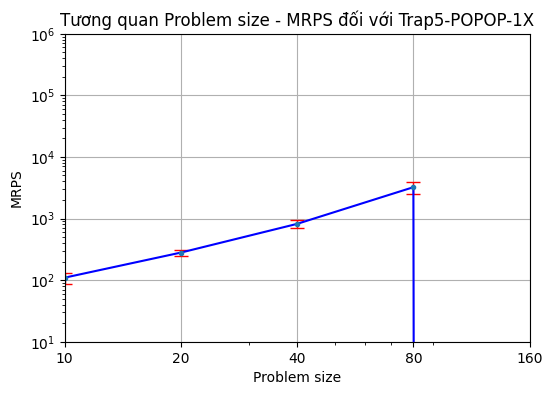

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

# plots
ax.errorbar(problem_sizes, mrps_mean, yerr=mrps_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, mrps_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan Problem size - MRPS đối với Trap5-POPOP-1X')

#set x_axis
ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

# set y_axis
ax.set_yscale('log')
ax.set_ylabel('MRPS')

plt.show()

In [28]:
fig.savefig('graphs/Problem size - MRPS - Trap5-POPOP-1X.png')

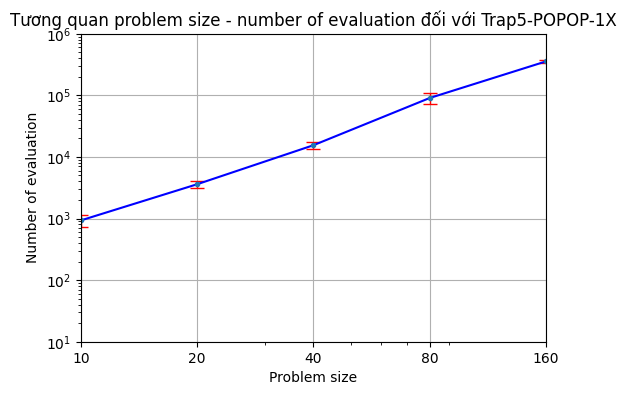

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(problem_sizes, evaluations_mean, yerr=evaluations_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, evaluations_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan problem size - number of evaluation đối với Trap5-POPOP-1X')

ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

ax.set_ylabel('Number of evaluation')
ax.set_yscale('log')

plt.show()

In [30]:
fig.savefig('graphs/problem size - number of evaluation - Trap5-POPOP-1X.png')